<a href="https://colab.research.google.com/github/utpalrtw/projects/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing needed libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('Lung cancer.csv')

In [4]:
df.sample(5)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
796802,796803,52,Male,Croatia,23-03-2015,Stage IV,Yes,Former Smoker,24.9,227,1,0,0,0,Surgery,08-04-2016,0
40246,40247,64,Male,Luxembourg,06-11-2022,Stage II,Yes,Never Smoked,20.0,231,0,1,0,0,Chemotherapy,08-05-2024,0
877107,877108,62,Male,Bulgaria,23-02-2024,Stage II,No,Former Smoker,25.4,240,0,1,0,0,Radiation,17-06-2025,0
152529,152530,48,Male,Hungary,10-08-2021,Stage I,Yes,Current Smoker,33.2,268,1,0,1,0,Radiation,01-08-2023,0
228301,228302,52,Female,Slovenia,07-01-2022,Stage II,No,Current Smoker,22.8,224,1,0,0,0,Combined,18-11-2023,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  int64  
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

###Data Preprocessor

In [6]:
# first we chek for duplicate data entry
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='count', ylabel='country'>

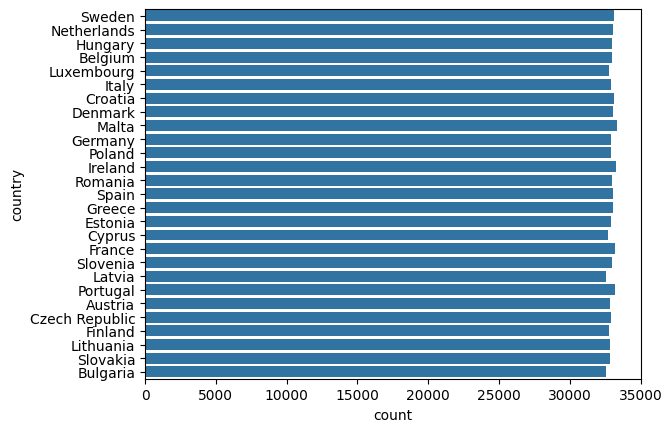

In [7]:
sns.countplot(df['country'])

we don't need country column to predict out put so we can drop this column.

In [8]:
data = df.drop(['id', 'country', 'diagnosis_date', 'end_treatment_date','bmi', 'other_cancer'], axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [10]:
data['gender'].value_counts()

,count
gender,
1,445134
0,444866


In [11]:
df['survived'].value_counts()

,count
survived,
0,693996
1,196004


Given Data is Highly imbalance

In [12]:
df['cancer_stage'].value_counts()

,count
cancer_stage,
Stage III,222594
Stage IV,222527
Stage I,222516
Stage II,222363


<Axes: xlabel='count', ylabel='smoking_status'>

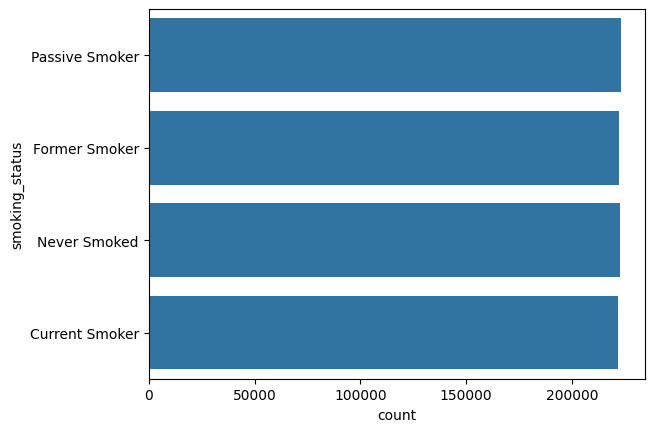

In [13]:
sns.countplot(df['smoking_status'])


<Axes: xlabel='count', ylabel='treatment_type'>

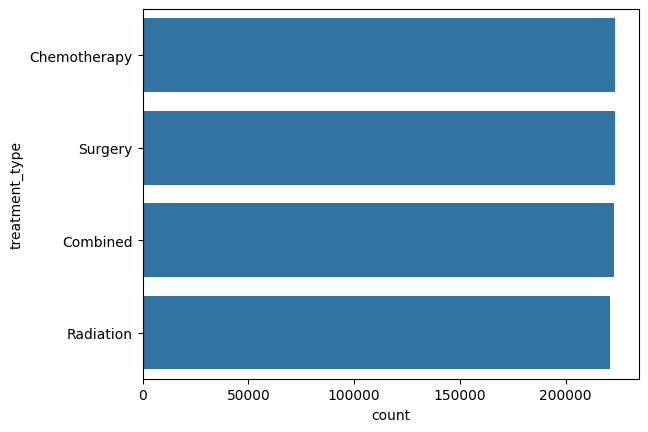

In [14]:
sns.countplot(df['treatment_type'])

from above information we can say data is Not bias and it's Good for prediction.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   age                890000 non-null  int64
 1   gender             890000 non-null  int64
 2   cancer_stage       890000 non-null  int64
 3   family_history     890000 non-null  int64
 4   smoking_status     890000 non-null  int64
 5   cholesterol_level  890000 non-null  int64
 6   hypertension       890000 non-null  int64
 7   asthma             890000 non-null  int64
 8   cirrhosis          890000 non-null  int64
 9   treatment_type     890000 non-null  int64
 10  survived           890000 non-null  int64
dtypes: int64(11)
memory usage: 74.7 MB


In [16]:
data.describe()

,age,gender,cancer_stage,family_history,smoking_status,cholesterol_level,hypertension,asthma,cirrhosis,treatment_type,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,55.007008,0.500151,1.500148,0.499797,1.502464,233.633916,0.750024,0.469740,0.225956,1.499020,0.220229
std,9.994485,0.500000,1.118078,0.500000,1.118100,43.432278,0.432999,0.499084,0.418211,1.119564,0.414401
min,4.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,0.000000,1.000000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,2.000000,0.000000,2.000000,242.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,62.000000,1.000000,3.000000,1.000000,3.000000,271.000000,1.000000,1.000000,0.000000,3.000000,0.000000
max,104.000000,1.000000,3.000000,1.000000,3.000000,300.000000,1.000000,1.000000,1.000000,3.000000,1.000000


<Axes: >

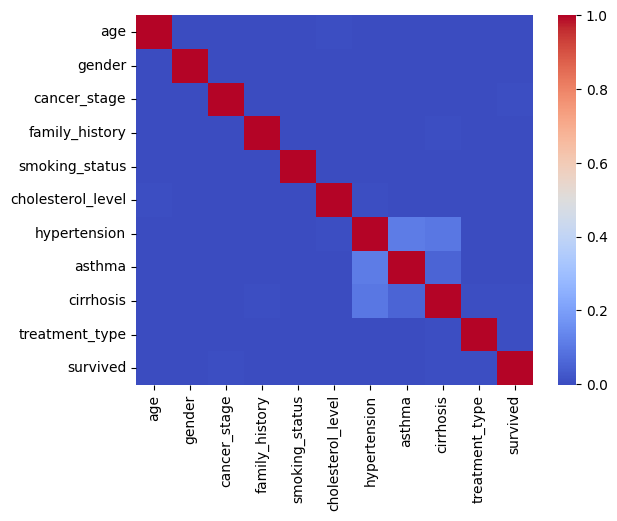

In [17]:
sns.heatmap(data.corr(), cmap='coolwarm')

Most of the columns are weakly correlate

In [18]:
data.head()

,age,gender,cancer_stage,family_history,smoking_status,cholesterol_level,hypertension,asthma,cirrhosis,treatment_type,survived
0,64,1,0,1,3,199,0,0,1,0,0
1,50,0,2,1,3,280,1,1,0,3,1
2,65,0,2,1,1,268,1,1,0,1,0
3,51,0,0,0,3,241,1,1,0,0,0
4,37,1,0,0,3,178,0,0,0,1,0


In [19]:
print(data.corr()["survived"].abs().sort_values(ascending=False))

survived             1.000000
cancer_stage         0.002519
treatment_type       0.002354
cirrhosis            0.001956
asthma               0.001809
family_history       0.001322
age                  0.001233
gender               0.000762
cholesterol_level    0.000157
smoking_status       0.000087
hypertension         0.000059
Name: survived, dtype: float64


In [20]:
X = data.drop('survived', axis = 1)
y = data['survived']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [24]:
y_pred = lr.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("accuracy: ",accuracy_score(y_test, y_pred))
print(cm)


accuracy:  0.7788707865168539
[[138639      0]
 [ 39361      0]]


In [26]:
print(report)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    138639
           1       0.00      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.39      0.50      0.44    178000
weighted avg       0.61      0.78      0.68    178000



We try to reduce false Positive

In [27]:
from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state=0)
cf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [28]:
y_pred1 = cf.predict(X_test)

In [29]:
print("accuracy", accuracy_score(y_test, y_pred1))

accuracy 0.7299550561797753


In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [31]:
y_pred_xgb = xgb.predict(X_test)

In [32]:
print(accuracy_score(y_test, y_pred_xgb))

0.7787752808988764


In [33]:
from imblearn.under_sampling import NearMiss
from collections import Counter
print(f"Class distribution before undersampling: {Counter(y)}")

nm = NearMiss(version=1)
X_resampled, y_resampled = nm.fit_resample(X, y)

print(f"Class distribution after undersampling: {Counter(y_resampled)}")

Class distribution before undersampling: Counter({0: 693996, 1: 196004})
Class distribution after undersampling: Counter({0: 196004, 1: 196004})


Under sampling cause a reason for losing information so, accuracy decreased

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_re_train, y_re_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [35]:
xgb.fit(x_train, y_re_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [36]:
y_pred_new = xgb.predict(x_test)

In [37]:
print(accuracy_score(y_re_test, y_pred_new))

0.6403025433024667


In [38]:
cf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [39]:
y_pred = cf.predict(x_test)

In [40]:
accuracy_score(y_re_test, y_pred)

0.5003826432999158

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best params and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Accuracy: 0.7800


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best params and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.7800


In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Best params and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Best Accuracy: 0.7363


I Got best accuracy around 78%